In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)
filename = 'gpt-3.5-p3'
path = './data_out/'

df = pd.read_csv(path + filename + '.csv')
df.replace(('YES', 'NO'), (1, 0), inplace=True)
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';')

In [178]:
res = {}
for i in range(38):
    pred = df[df['Paper'] == i]
    true = df_labels[df_labels['paper_id'] == i]
    
    paper_res = {}
    for col in pred:
        if col != 'Paper':
            paper_res[col] = pred[col].values[0] == true[col].values[0]
    res[i] = paper_res

df_res = pd.DataFrame.from_dict(res, orient='index')

Summed Acc:  11.31578947368421


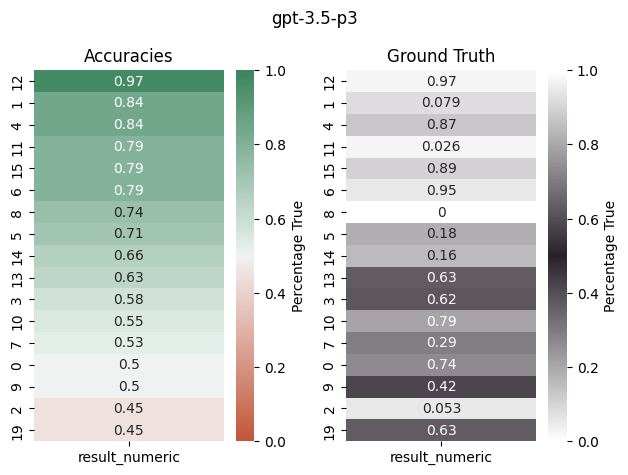

In [179]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df_res = df_res.reset_index().rename(columns={"index":"paper_id"})	
df_test = df_res.melt(id_vars=['paper_id'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '19'], var_name='question', value_name='result')

df_test['result_numeric'] = df_test['result'].astype(int)

percent_true_by_question = df_test.groupby('question')['result_numeric'].mean().reset_index()
percent_true_by_question = percent_true_by_question.sort_values(by='result_numeric', ascending=False)
print('Summed Acc: ', percent_true_by_question.sum()['result_numeric'])
g = sns.heatmap(
    percent_true_by_question.set_index('question'),
    annot=True, 
    cmap=sns.diverging_palette(20, 145, as_cmap=True), 
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax1
)
g.set_title('Accuracies')
g.set_xlabel('')
g.set_ylabel('')

df_lab = df_labels.melt(id_vars=['paper_id'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '19'], var_name='question', value_name='result')

df_lab['result_numeric'] = df_lab['result']
# Make sure question IDs align with Berend
#df_test['question'] = df_test['question'].astype(int)
#df_test['question'] += 1
#df_test['question'] = df_test['question'].replace(20, 17)

percent_true_by_question_lab = df_lab.groupby('question')['result_numeric'].mean().reset_index()
percent_true_by_question_lab = percent_true_by_question_lab.reindex(percent_true_by_question.index)


#percent_true_by_question = percent_true_by_question.sort_values(by='result_numeric', ascending=False)

g = sns.heatmap(
    percent_true_by_question_lab.set_index('question'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax2
)
g.set_title('Ground Truth')
g.set_xlabel('')
g.set_ylabel('')
fig.suptitle(filename)
fig.tight_layout()